In [13]:
import pandas as pd
df = pd.read_csv('/workspaces/pds-2022-turquoise-team/20_intermediate_files/vital_stats_TEXAS_merged.csv')
df = df.drop(['Crude Rate'], axis = 1)

/tmp/ipykernel_7430/3093214358.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/tmp/ipykernel_7430/3093214358.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


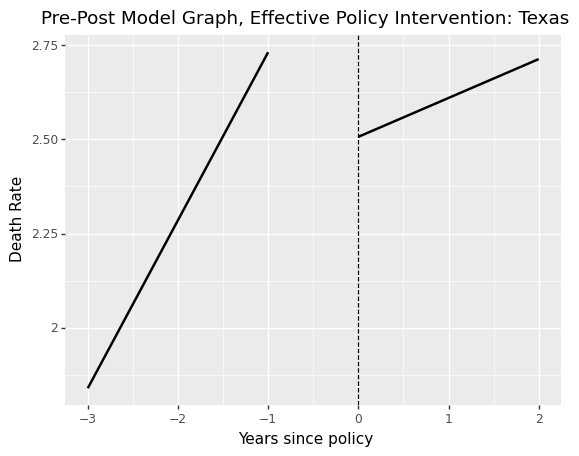

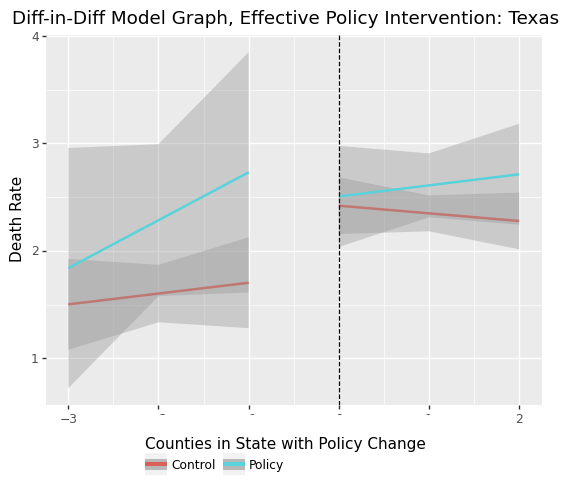

In [17]:
from plotnine import *

we_want_texas = ['Arkansas', 'California', 'Georgia', 'Missouri', 'New York', 'Wyoming']
df_texas = df[df['State'].isin(we_want_texas)]
groupedby_df_texas = df_texas.groupby(["Year"]).sum() # we feel that sum is the most accurate function to use
groupedby_df_texas = groupedby_df_texas.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_texas['Death Rate'] = (groupedby_df_texas['Deaths']/groupedby_df_texas['Population'])*100_000
we_want_only_texas = ['Texas']
df_only_texas = df[df['State'].isin(we_want_only_texas)]

groupedby_df_only_texas = df_only_texas.groupby(["Year"]).sum() 
groupedby_df_only_texas = groupedby_df_only_texas.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_only_texas['Death Rate'] = (groupedby_df_only_texas['Deaths']/groupedby_df_only_texas['Population'])*100_000

def label_row(row): 
    if row['Year'] == 2004:
        return -3
    if row['Year'] == 2005: 
        return -2
    if row['Year'] == 2006:
        return -1
    if row['Year'] == 2007: 
        return 0
    if row['Year'] == 2008: 
        return 1
    if row['Year'] == 2009: 
        return 2

groupedby_df_only_texas['Years since policy'] = groupedby_df_only_texas.apply (lambda row: label_row(row), axis = 1) 
groupedby_df_texas['Years since policy'] = groupedby_df_texas.apply (lambda row: label_row(row), axis = 1) 

g = (
    ggplot(groupedby_df_only_texas, aes(x="Years since policy", y="Death Rate"))
    + geom_smooth(
        method="lm",
        data=groupedby_df_only_texas[groupedby_df_only_texas["Years since policy"] < 0],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=groupedby_df_only_texas[groupedby_df_only_texas["Years since policy"] >= 0],
        se=False,
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=6.1, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph, Effective Policy Intervention: Texas")
)
#g.save("images/prepost_successful.pdf")
print(g)



groupedby_df_only_texas['Policy or Control'] = 'Policy'
groupedby_df_texas['Policy or Control'] = 'Control'
texas_policy_control = pd.concat([groupedby_df_texas, groupedby_df_only_texas])

h = (
    ggplot(
        texas_policy_control,
        aes(x="Years since policy", y="Death Rate", color="Policy or Control"),
    )
    + geom_smooth(
        method="lm", data=texas_policy_control[texas_policy_control["Years since policy"] < 0]
    )
    + geom_smooth(
        method="lm", data=texas_policy_control[texas_policy_control["Years since policy"] >= 0]
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=7, label="Policy or Control", color="black")
    + labs(
        title="Diff-in-Diff Model Graph, Effective Policy Intervention: Texas",
        color="Counties in State with Policy Change",
    )
    + theme(legend_position="bottom")
)
#g.save("images/diffindiff_successful.pdf")
print(h)